In [2]:
%pylab inline
from pylab import *
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

Populating the interactive namespace from numpy and matplotlib


In [3]:
mpl.rcParams.update({'font.size':18})

In [4]:
x,y,f = np.loadtxt("array_18x18.xyz",usecols=(1,2,4),skiprows=2,unpack=True)

In [5]:
r = 1.1
Dic = {}
natoms = int( len(x) )
for n in range(natoms):
    a = sqrt( (x[n]-x)*(x[n]-x) + (y[n]-y)*(y[n]-y) ) < r
    vecinos = [i for i, x in enumerate(a) if x and i!=n]
    Dic[n] = vecinos

In [6]:
H = np.zeros((natoms,natoms), dtype = 'complex')

In [7]:
Hop = {}
a = exp(-1j*pi)
γ = 1
λ = 4.5
for n in Dic.keys():
    vecinos = Dic[n]
    hop = []
    for v in vecinos:
        f0 = f[n]
        f1 = f[v]
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        H[n,v] = fase
        H[v,n] = fase
        hop.append(fase)
    Hop[n] = hop

f0 = 0
f1 = 0
fase = 1
for n in Dic.keys():
    vecinos = Dic[n]
    c = 0
    for v in vecinos:
        posx     = x[n]
        posy     = y[n]
        f0       = f[n]
        f1       = f[v] 
        if f0 == f1:
            fase = γ
        else: 
            fase = λ
        
        if ( posx%2==0 and posy%2==0  ):
            if ( x[v] > x[n] ):
                H[(n,v)] = a*fase
                H[(v,n)] = a*fase
        elif(posx%2==1 and posy%2==1):
            if ( x[v] > x[n] ):
                H[(n,v)] = a*fase
                H[(v,n)] = a*fase
        else:
            pass

In [8]:
Hop = {}
for i in Dic.keys():
    Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]
    

In [9]:
Hop = {}
for i in Dic.keys():
    Hop[i] = [H[i][j] for j in range(len(H[i])) if H[i][j]!= 0]

In [10]:
Hop[1]

[(-1-1.2246467991473532e-16j), (4.5+0j), (1+0j)]

In [11]:
np.savetxt('halmitonian.txt',H)

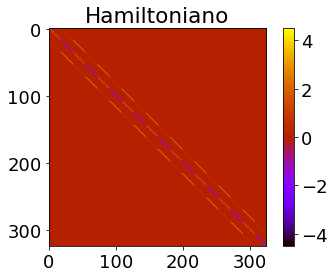

In [12]:
fig, ax = plt.subplots()
cx = ax.imshow(H.real, cmap = 'gnuplot')
ax.set_title('Hamiltoniano')
fig.colorbar(cx)
fig.savefig('hamiltonian_sin_6x6.pdf')

In [13]:
%%time
Ek, U = eigh(H)
Ek = np.real(Ek)
#U = np.real(U)

CPU times: user 382 ms, sys: 81.4 ms, total: 464 ms
Wall time: 106 ms


In [14]:
np.savetxt("Energias.txt",Ek,fmt = '%s', comments = '')
np.savetxt("Estados.txt",U,fmt = '%s', comments = '')

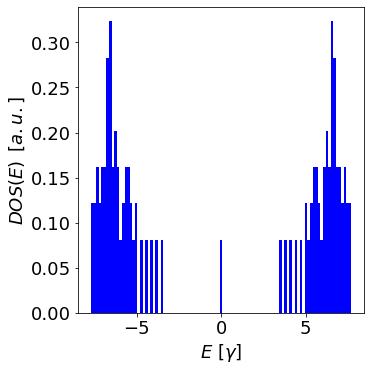

In [15]:
fig, ax = plt.subplots(figsize = (5.5,5.5))
ax.hist(np.real(Ek),101, density = 1, color = 'b')
ax.set_ylabel('$DOS(E) \,\,\,[a.u.]$')
ax.set_xlabel('$E\,\,[\gamma]$')
fig.tight_layout()
#ax.set_title('Density of States')
fig.savefig('Dos_6x6.pdf')

In [16]:
indexsort = argsort(Ek)
Est = [i for i,val in enumerate(Ek) if abs(val) < 0.2]
ek = np.mean(Ek[Est])
s = [np.real(U.T[i]*U.conjugate().T[i]) for i in Est]
S = np.zeros(len(s[0]))
for i in range(len(s)):
    S += s[i] 
S = S/len(s)

In [17]:
Est

[160, 161, 162, 163]

In [18]:
Rx = []
Ry = []
for i in np.unique(f):
    find = [j for j,val in enumerate(f) if val == i]
    X = [x[i] for i in find]
    Y = [y[i] for i in find]
    xmax = np.amax(X)
    xmin = np.amin(X)
    ymax = np.amax(Y)
    ymin = np.amin(Y)
    rx = (xmax + xmin)/2
    ry = (ymax + ymin)/2
    Rx.append(rx)
    Ry.append(ry)

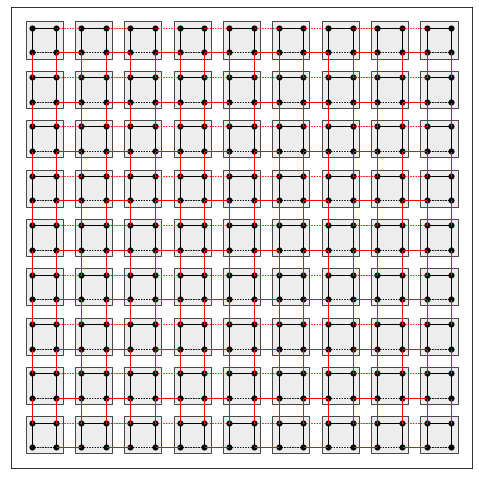

In [27]:
figsize(7,7)
fig, ax = plt.subplots(1)
#ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.plot(x,y, marker='o', color='black', markersize=5,linestyle="")
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)
for i in Dic.keys():
    c = 0
    for v in Dic[i]:
        if Hop[i][c].real == 1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 1)
        elif Hop[i][c].real == -1:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'black', lw = 1, ls = ':')
        elif Hop[i][c].real == 4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = 1)
        elif Hop[i][c].real == -4.5:
            ax.plot((x[i],x[v]),(y[i],y[v]),c = 'r', lw = 1, ls = ':')
        c+=1  
    
pc = PatchCollection(boxes, facecolor='#e6e6e6', alpha=0.7,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
#ax.set_title(r'$\lambda = 4.5, \gamma = 1$')
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig('hoti_square.pdf')
plt.show()

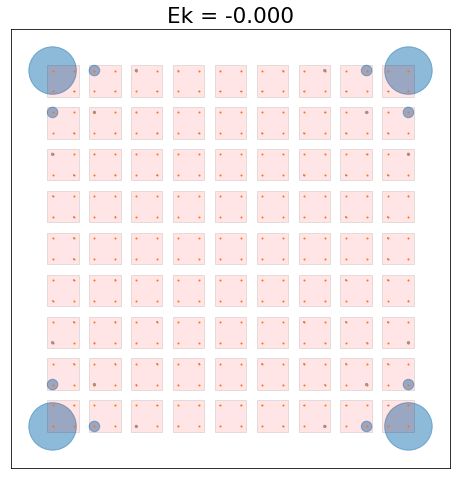

In [19]:
fig, ax = plt.subplots(1)
ax.scatter(x,y,s=S*10000,alpha=0.5)
ax.scatter(x,y, s = 1)
boxes = []
for i in range(len(Rx)):
    rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
    boxes.append(rect)

pc = PatchCollection(boxes, facecolor='r', alpha=0.1,edgecolor='black')
ax.add_collection(pc)
fig.tight_layout()
ax.set_aspect('equal')
ax.set_title("Ek = {0:.3f}".format(ek))
ax.set_xlim(-2,19)
ax.set_ylim(-2,19)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.savefig('state_square.pdf')
plt.show()

In [20]:
indexsort = argsort(Ek)

In [21]:
from ipywidgets import *


In [22]:
Ei = np.unique(np.round(Ek,3))
@interact(n=(0,len(Ei) - 1))
def enpsi(n=0):
    Est = [i for i,val in enumerate(np.round(Ek,3)) if val == Ei[n]]
    Esel = Ei[n]
    s = [np.real(U.T[i]*U.conjugate().T[i]) for i in Est]
    S = np.zeros(len(s[0]))
    for i in range(len(s)):
        S += s[i] 
    S = S/len(s)
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6.0,6.0))
    axes.set_title("Ek = {0:.3f}".format(Esel))
    axes.scatter(x,y,color="red",s=3,zorder=2)
    axes.scatter(x,y,s=S*10000,alpha=0.5)
    
    fig.tight_layout()
    boxes = []
    for i in range(len(Rx)):

        rect = Rectangle((Rx[i] - .75, Ry[i] - .75), 1.5,1.5)
        boxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(boxes, facecolor='r', alpha=0.1,
                         edgecolor='black')

    # Add collection to axes
    axes.add_collection(pc)
    plt.show()

    

interactive(children=(IntSlider(value=0, description='n', max=88), Output()), _dom_classes=('widget-interact',…

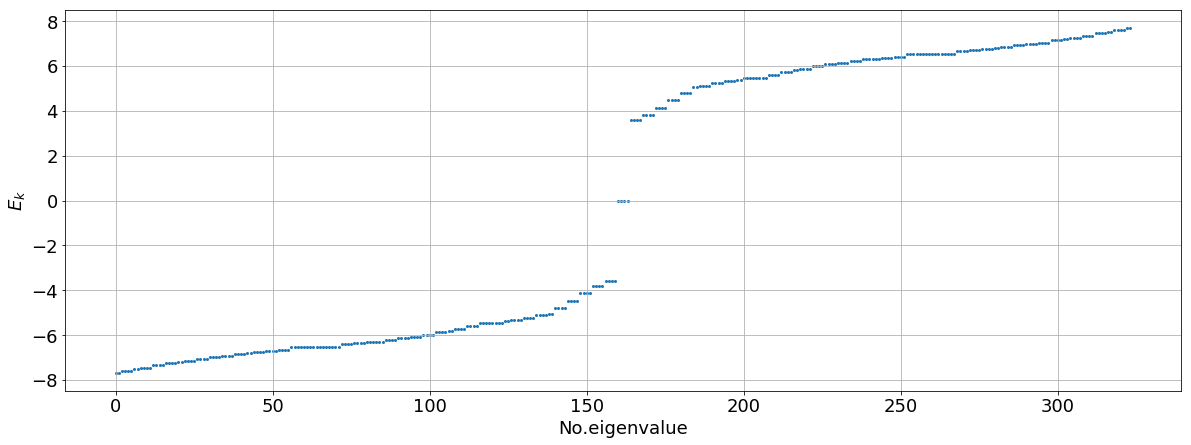

In [23]:
fig, ax = plt.subplots()
ax.scatter(range(len(indexsort)),Ek[indexsort],s = 4)
ax.set_xlabel("No.eigenvalue")
ax.set_ylabel("$E_k$")
ax.grid()

## Numero de Chern

flujo de barry 
$$F_{nm} = -Im(log\,( \langle \psi_{n,m} | \psi_{n +1,m} \rangle \,\langle \psi_{n+1,m} | \psi_{n +1,m + 1} \rangle \,\langle \psi_{n+1,m+1} | \psi_{n ,m+1} \rangle\, \langle \psi_{n,m+1} | \psi_{n,m} \rangle))$$

In [36]:
##funcion para encontrar los estados que posteriormente se braketearan 
#(jajaja) en el flujo de barry

Chern = []
for ek in range(0,len(Ek)):#,len(Ek)):
    Fbarry = []
    for i in range(0,18):
        for j in range(0,18):
                ax  = np.where(x == i)
                bx  = np.where(x == i+1)
                a   = np.hstack((ax,bx))
                ny  = y[a][0]
                ay  = np.where(ny == j)
                by  = np.where(ny == j+1)
                b   = np.hstack((ay,by))[0]
                #print(b,i,j)
                ϕ   = U.T[ek][b]
                if len(b) == 4:
                    fb = -(log(ϕ[0]*ϕ[2].conjugate()*ϕ[2]*ϕ[3].conjugate()*ϕ[3]*ϕ[1].conjugate()*ϕ[1]*ϕ[0].conjugate()).imag)
                    Fbarry.append(fb)
                    
    Q = sum(Fbarry)/(2*pi)
    Chern.append(Q)            

    


/home/madv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


## Wilson loops k-space

In [ ]:
figsize(6,4)
for ky in linspace(0,pi,500):
    WL=eye(4)
    for kx in linspace(-pi,pi,5):
        H=BHZ(kx,ky,-2.1,z2)
        eigdat=eigh(H);
        eigdat[0]<0
        P=eigdat[1][:,eigdat[0]<0]*eigdat[1][:,eigdat[0]<0].H
        WL=P*WL
    weig=eig(WL);
    indx=where(abs(weig[0])>10**-10)[0]
    plot(ky*ones(len(indx)),angle(weig[0][indx]),'ko',ms=4)


plot([0,pi],[-1,-1],'b-')
ylim(-pi,pi)
xlim(0,pi)
xlabel(r'$k_y$') # 0 -pi pi
ylabel(r'Wilson loop phases $\theta$ ');